# ORIE 4580/5580/5581 Assignment 6

#### Students: Riley Coogan (rmc329) and Oscar Callamari-Abrams (oc67)

### Github link: [Github link](https://github.com/OscarC-A/4580-SimModeling)


### Instructions


* Due Thursday, November 20, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on Canvas. Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

n       Mean E[T_n]    95% CI low     95% CI high    n log n        
--------------------------------------------------------------------------------
5       11.477         11.321         11.632         8.047          
10      29.167         28.823         29.511         23.026         
20      72.341         71.602         73.079         59.915         
50      225.116        223.224        227.008        195.601        
100     518.254        514.381        522.127        460.517        
200     1168.728       1161.053       1176.404       1059.663       
500     3388.751       3368.915       3408.586       3107.304       


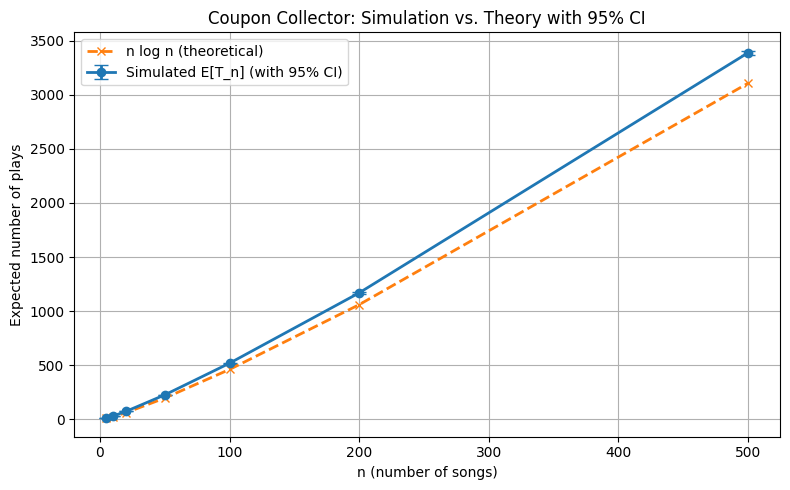

In [ ]:
import random
import math
import statistics as stats
import matplotlib.pyplot as plt

def simulate_coupon_collector(n, trials=5000):
    """
    Simulates the expected number of random draws needed
    to see all n distinct items (coupon collector problem).
    Returns sample mean and 95% CI bounds.
    """
    results = []
    for _ in range(trials):
        seen = set()
        t = 0
        while len(seen) < n:
            seen.add(random.randrange(n))
            t += 1
        results.append(t)

    mean = stats.fmean(results)
    sd = stats.pstdev(results)
    se = sd / math.sqrt(trials)    # standard error
    ci_low = mean - 1.96 * se
    ci_high = mean + 1.96 * se

    return mean, ci_low, ci_high


def run_experiment(n_values, trials=5000):
    means = []
    ci_lows = []
    ci_highs = []
    approx_vals = []

    print(f"{'n':<8}{'Mean E[T_n]':<15}{'95% CI low':<15}{'95% CI high':<15}{'n log n':<15}")
    print("-" * 80)

    for n in n_values:
        mean, ci_low, ci_high = simulate_coupon_collector(n, trials)
        approx = n * math.log(n)

        means.append(mean)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
        approx_vals.append(approx)

        print(f"{n:<8}{mean:<15.3f}{ci_low:<15.3f}{ci_high:<15.3f}{approx:<15.3f}")

    return means, ci_lows, ci_highs, approx_vals


def plot_results(n_values, means, ci_lows, ci_highs, approx_vals):
    # Compute symmetric error bar height
    errors = [mean - ci for mean, ci in zip(means, ci_lows)]

    plt.figure(figsize=(8, 5))

    # Plot simulated means with error bars
    plt.errorbar(
        n_values,
        means,
        yerr=errors,
        fmt='o-',
        capsize=5,
        linewidth=2,
        label="Simulated E[T_n] (with 95% CI)"
    )

    # Plot n log n theoretical comparison
    plt.plot(n_values, approx_vals, 'x--', linewidth=2, label="n log n (theoretical)")

    plt.xlabel("n (number of songs)")
    plt.ylabel("Expected number of plays")
    plt.title("Coupon Collector: Simulation vs. Theory with 95% CI")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# -------------------------------
# Run Simulation
# -------------------------------
if __name__ == "__main__":
    n_values = [5, 10, 20, 50, 100, 200, 500]
    means, ci_lows, ci_highs, approx_vals = run_experiment(n_values, trials=4000)
    plot_results(n_values, means, ci_lows, ci_highs, approx_vals)



Note: After initially running, it appeared as though the function closely resembled n log n, which was then graphed along with the original function.

<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

Song : Probability of being last new
 1 : 0.0000
 2 : 0.0528
 3 : 0.0534
 4 : 0.0522
 5 : 0.0516
 6 : 0.0530
 7 : 0.0523
 8 : 0.0523
 9 : 0.0532
10 : 0.0524
11 : 0.0532
12 : 0.0520
13 : 0.0528
14 : 0.0527
15 : 0.0509
16 : 0.0535
17 : 0.0531
18 : 0.0537
19 : 0.0525
20 : 0.0524


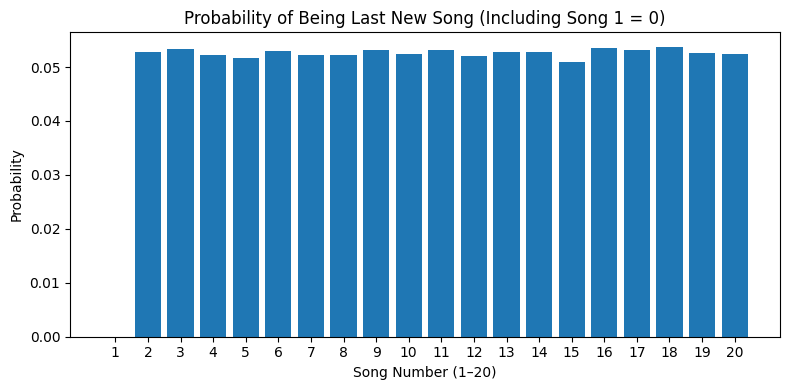

In [ ]:
import random
from collections import Counter
import matplotlib.pyplot as plt

def simulate_last_new_song(n=20, trials=100000, start=1):
    last_songs = []
    for _ in range(trials):
        current = start
        seen = {current}
        last_new = None

        while len(seen) < n:
            step = 1 if random.random() < 0.5 else -1
            current = (current + step) % n
            if current not in seen:
                seen.add(current)
                last_new = current

        last_songs.append(last_new)

    return last_songs

# Parameters
n = 20
trials = 100000
start = 0

# Run simulation
last_songs = simulate_last_new_song(n=n, trials=trials, start=start)

# Convert internal 0–19 indexing to external 1–20
last_songs_shifted = [x + 1 for x in last_songs]

# Build probability dictionary including missing entries as 0
counts = Counter(last_songs_shifted)
probs = []
songs = list(range(1, n+1))  # force all songs 1–20

for s in songs:
    probs.append(counts[s] / trials if s in counts else 0.0)

# Print nicely
print("Song : Probability of being last new")
for s, p in zip(songs, probs):
    print(f"{s:2d} : {p:.4f}")

# Plot
plt.figure(figsize=(8, 4))
plt.bar(songs, probs)
plt.xticks(songs)
plt.xlabel("Song Number (1–20)")
plt.ylabel("Probability")
plt.title("Probability of Being Last New Song (Including Song 1 = 0)")
plt.tight_layout()
plt.show()



<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

 a  | Simulated P(A wins) | Theoretical P(A wins)
-----------------------------------------------
 0 |       0.0000        |         0.0000
 1 |       0.0481        |         0.0500
 2 |       0.1001        |         0.1000
 3 |       0.1500        |         0.1500
 4 |       0.1995        |         0.2000
 5 |       0.2479        |         0.2500
 6 |       0.2979        |         0.3000
 7 |       0.3500        |         0.3500
 8 |       0.4001        |         0.4000
 9 |       0.4521        |         0.4500
10 |       0.4982        |         0.5000
11 |       0.5504        |         0.5500
12 |       0.6031        |         0.6000
13 |       0.6546        |         0.6500
14 |       0.6992        |         0.7000
15 |       0.7516        |         0.7500
16 |       0.8024        |         0.8000
17 |       0.8509        |         0.8500
18 |       0.8984        |         0.9000
19 |       0.9509        |         0.9500
20 |       1.0000        |         1.0000


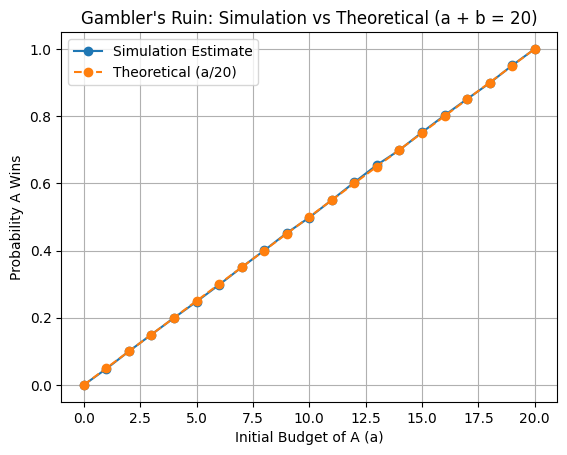

In [ ]:
import random
import matplotlib.pyplot as plt

# -------------------------------------
# Function to simulate Gambler's Ruin
# -------------------------------------
def simulate_gamblers_ruin(a, b, trials=20000):
    wins_A = 0
    total = a + b

    for _ in range(trials):
        wealth_A = a
        wealth_B = b

        # Continue until one player is bankrupt
        while wealth_A > 0 and wealth_B > 0:
            if random.random() < 0.5:
                wealth_A += 1
                wealth_B -= 1
            else:
                wealth_A -= 1
                wealth_B += 1

        if wealth_A == total:  # A wins all money
            wins_A += 1

    return wins_A / trials


# -------------------------------------
# Main computation
# -------------------------------------
def main():
    total_budget = 20
    trials = 20000

    a_values = list(range(total_budget + 1))
    sim_probs = []
    theoretical_probs = []

    # Run simulations and compute theoretical values
    for a in a_values:
        b = total_budget - a

        # Special cases
        if a == 0:
            sim_probs.append(0.0)
        elif b == 0:
            sim_probs.append(1.0)
        else:
            sim_probs.append(simulate_gamblers_ruin(a, b, trials))

        theoretical_probs.append(a / total_budget)

    # -------------------------------------
    # Print comparison table
    # -------------------------------------
    print(" a  | Simulated P(A wins) | Theoretical P(A wins)")
    print("-----------------------------------------------")
    for a, s, t in zip(a_values, sim_probs, theoretical_probs):
        print(f"{a:2d} |       {s:.4f}        |         {t:.4f}")

    # -------------------------------------
    # Plot results
    # -------------------------------------
    plt.figure()
    plt.plot(a_values, sim_probs, 'o-', label='Simulation Estimate')
    plt.plot(a_values, theoretical_probs, 'o--', label='Theoretical (a/20)')

    plt.xlabel('Initial Budget of A (a)')
    plt.ylabel('Probability A Wins')
    plt.title("Gambler's Ruin: Simulation vs Theoretical (a + b = 20)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Run
if __name__ == "__main__":
    main()


The formula appears to simply be a/20, which was then graphed with the simulation above.

**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

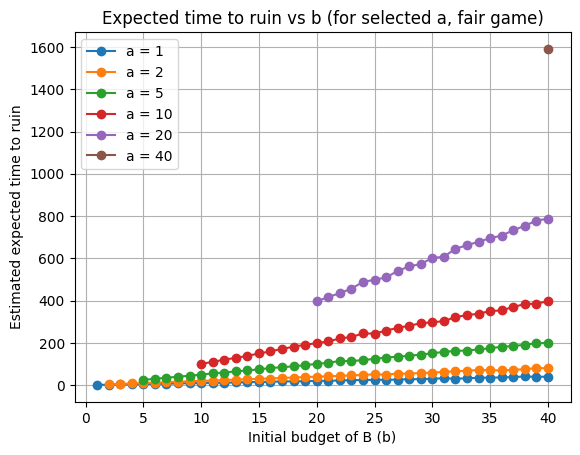

For a = 5, approximate time/(a*b) ratios:
b =  5, ratio ≈ 0.995
b =  6, ratio ≈ 0.993
b =  7, ratio ≈ 1.003
b =  8, ratio ≈ 0.999
b =  9, ratio ≈ 0.995
b = 10, ratio ≈ 1.012
b = 11, ratio ≈ 0.986
b = 12, ratio ≈ 1.005
b = 13, ratio ≈ 0.994
b = 14, ratio ≈ 1.018
b = 15, ratio ≈ 0.999
b = 16, ratio ≈ 1.021
b = 17, ratio ≈ 0.982
b = 18, ratio ≈ 1.029
b = 19, ratio ≈ 1.011
b = 20, ratio ≈ 1.004
b = 21, ratio ≈ 1.006
b = 22, ratio ≈ 1.012
b = 23, ratio ≈ 0.991
b = 24, ratio ≈ 1.008
b = 25, ratio ≈ 0.992
b = 26, ratio ≈ 1.000
b = 27, ratio ≈ 0.996
b = 28, ratio ≈ 0.978
b = 29, ratio ≈ 0.977
b = 30, ratio ≈ 1.001
b = 31, ratio ≈ 0.992
b = 32, ratio ≈ 0.994
b = 33, ratio ≈ 0.998
b = 34, ratio ≈ 0.986
b = 35, ratio ≈ 0.992
b = 36, ratio ≈ 0.971
b = 37, ratio ≈ 0.979
b = 38, ratio ≈ 0.986
b = 39, ratio ≈ 1.013
b = 40, ratio ≈ 1.003


In [ ]:
import random
import matplotlib.pyplot as plt

def simulate_time_to_ruin(a, b, trials=10000):
    """
    Return an estimate of the expected time to ruin
    (number of rounds until A or B goes broke),
    using Monte Carlo simulation.
    """
    total_steps = 0

    for _ in range(trials):
        A = a
        B = b
        steps = 0

        # Play until someone is ruined
        while A > 0 and B > 0:
            if random.random() < 0.5:
                A += 1
                B -= 1
            else:
                A -= 1
                B += 1
            steps += 1

        total_steps += steps

    return total_steps / trials


def main():
    # We can assume a <= b by symmetry
    max_b = 40                # you can increase this if you like
    trials = 10000            # more trials = smoother curves, but slower

    selected_a = [1, 2, 5, 10, 20, 40]

    for a in selected_a:
        b_values = list(range(a, max_b + 1))        # ensure b >= a
        times = [simulate_time_to_ruin(a, b, trials=trials) for b in b_values]

        plt.plot(b_values, times, marker='o', label=f'a = {a}')

    plt.xlabel('Initial budget of B (b)')
    plt.ylabel('Estimated expected time to ruin')
    plt.title("Expected time to ruin vs b (for selected a, fair game)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # (Optional) quick check of time / (a*b) for one a
    a = 5
    b_values = list(range(a, max_b + 1))
    times = [simulate_time_to_ruin(a, b, trials=trials) for b in b_values]
    ratios = [t / (a * b) for t, b in zip(times, b_values)]
    print("For a = 5, approximate time/(a*b) ratios:")
    for b, r in zip(b_values, ratios):
        print(f"b = {b:2d}, ratio ≈ {r:.3f}")


if __name__ == "__main__":
    main()


<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)


Consider the model of the Fingerlakes Regional Hospital as shown below. New patients arrive at the reception at a rate of 20/hr and emergency patients enter the ER at a rate of 5/hr. The reception desk for non-emergency patients is managed by $n_R$ associates. Admission at the reception (not counting any queueing time) takes 5 minutes on average, regardless of whether the non-emergency patient is first-time or returning. The clinic is served by $d_C$ doctors with an average visit time of 15 minutes. About one in every four patients visiting the clinic are asked to return for a follow-up appointment that is, on average, 3 weeks (504 hours) later in time; another one-tenth of visitors to the clinic are referred to the internal ward (IW); the rest are treated and discharged. Patients arriving to the ER require about 1 hour of time with a doctor. The ER is staffed by $d_E$ doctors. Half of the patients in the ER are discharged after treatment, with the remainder referred to the IW. The average stay in the IW is about 72 hours and there are $n_I$ IW beds available. After a stay at the IW, 20\% of patients are discharged, whereas the rest are asked to return for a follow-up appointment as a non-emergency patient that is, on average, 3 weeks (504 hours) later in time. The reception, clinic, ER and IW all have their separate waiting areas and wait-lists, and serve patients on a FCFS basis.


![](hwq2figure.png)

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?

<hr>

## Ans.

First, we must find the total patient flow rate through each part (station) of the hospital per hour, denoted by $F_R, F_C, F_E, F_I$.

$F_R = 20+\tfrac14F_C+\tfrac45F_I\\
F_C = F_R\\
F_E = 5\\
F_I = \tfrac12F_E + \frac{1}{10}F_C$



$F_I = \tfrac52 + \frac{1}{10}F_C\\
F_R = 20 + \tfrac14F_C + 2 + \frac{2}{25}F_C = 22 + \frac{33}{100}F_C\\
\frac{67}{100}F_R = 22\\
F_R = F_C = \frac{2200}{67} \approx 32.84\\
F_I = \tfrac52 + \frac{1}{10} ⋅ \frac{2200}{67} = \frac{775}{134} \approx 5.78$

For each station, we then must have the number of 'servers' times server throuput per hour be greater than the total incoming flow.

$n_R \cdot 12 > 32.84\\
n_R \ge 3\\
d_C \cdot 4 > 32.84\\
d_C \ge 9\\
d_E \cdot 1 > 5\\
d_E \ge 6\\
N_I \cdot \frac{1}{72} > 5.78\\
N_I \ge 417$

<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

<hr>

## Ans.

We have total arrival rate into the clinic of $λ=\frac{2200}{67}$, c = 10 servers (doctors) working in the clinic each able to service $\mu = 4$ patients per hour. For the clinic to be a stable system we need the utlization per server to be < 1, which it is: $\rho = \frac{\lambda}{c\mu} = \frac{55}{67} \approx 0.8209$. Since the clinic can be seen as a M/M/c queue, the total expected amount of time a patient spends in the system is given by:

$\frac{C(c,\lambda/\mu)}{c\mu - \lambda}+\frac{1}{\mu}$

Where $C(c\lambda/\mu)$ is the probability an arriving patient sees all doctors currently busy.

$C(c, \lambda/\mu) = 1 \ / \ (1+(1-\rho)(\frac{c!}{(c\rho)^C})∑_{k=0}^{c-1}\frac{(c\rho)^k}{k!})\\
= 1 \ / \ 1 + (\frac{12}{67} \cdot (\frac{10!}{(\frac{550}{67})^{10}})\cdot \sum_{k=0}^9\frac{(\frac{555}{67})^k}{k!})\\
\approx 0.464789$

Expected total wait / patient:

$\frac{0.464789}{40 - \frac{2200}{67}}+\tfrac14 \approx 0.314877$ hours

Note: This also holds due to the fact that the other stations all have sufficient staff/beds (server utilization < 1) as the numbers are above the bounds found in part a.

The average number of busy clinic doctors can be found from the server utilization we found to be 0.8209. This means the average number of busy clinic doctors is 8.209.

<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

<hr>

## Ans.

Exact ER & Clinic server utilizations: $\rho_{C}=0.8209, \rho_E=\frac{5}{7}$.

Again, we have all 3 stations with server utilization rate < 1, and thus a stable system. Also, because the clinic and ER have seperate waiting areas, and no direct routing between each other (must go through IW/reception), we can model the 2 systems independently. This allows us to find:

$P(\text{ER Empty and Clinic Empty}) = P(\text{ER Empty})\cdot P(\text{Clinic Empty})$

For an M/M/c queue, the probability of the system containing 0 customers is given by:

$\pi_0 = \left[\left(\sum_{k=0}^{c-1} \frac{(c\rho)^k}{k!}\right)+\frac{(c\rho)^c}{c!}\,\frac{1}{1-\rho}\right]^{-1}\\
P(\text{ER Empty}) = \left[\left(\sum_{k=0}^{6} \frac{5^k}{k!}\right)+\frac{5^7}{7!}\,\tfrac72\right]^{-1}\approx 0.00597473\\
P(\text{Clinic Empty}) = \left[\left(\sum_{k=0}^{9} \frac{(\frac{550}{67})^k}{k!}\right)+\frac{(\frac{550}{67})^{10}}{10!}\,\frac{67}{12}\right]^{-1}\approx 0.000213937\\
P(\text{ER Empty and Clinic Empty}) = 0.00597473 \cdot 0.000213937 = 1.27821581201 × 10^{-6} $


<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

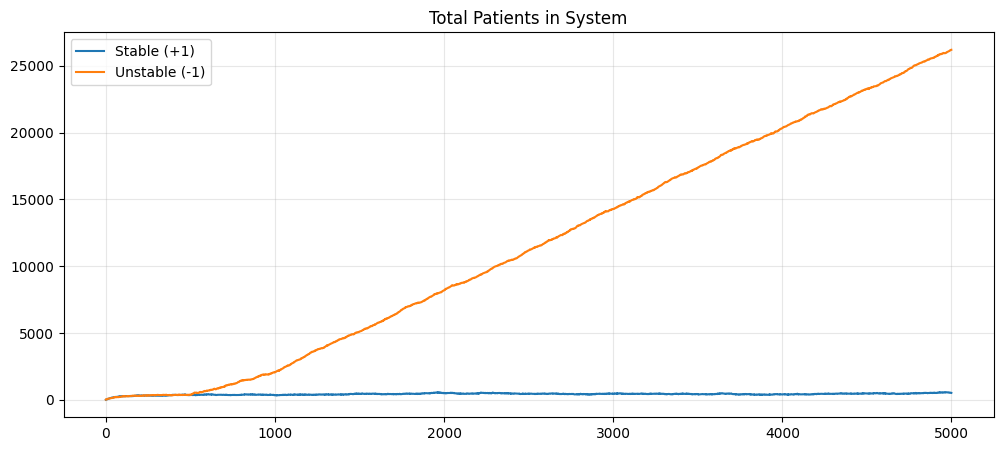

Avg Clinic Time: 0.3067 hrs (Theory: 0.3135)
Avg Busy Docs: 7.6959 (Theory: 8.209)


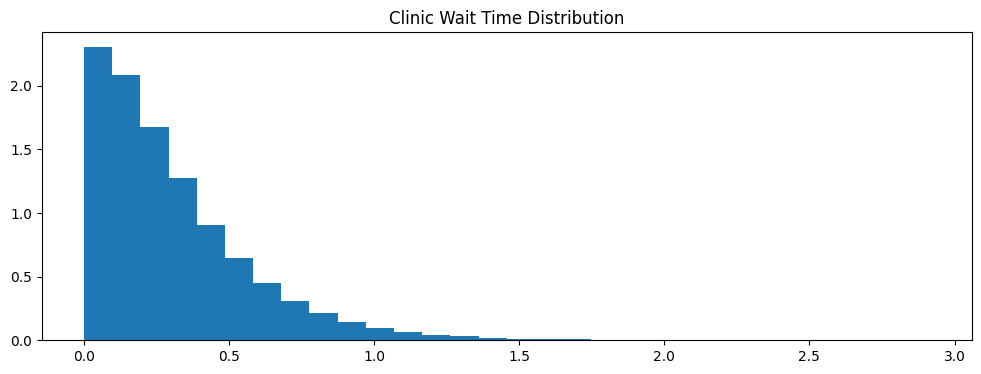

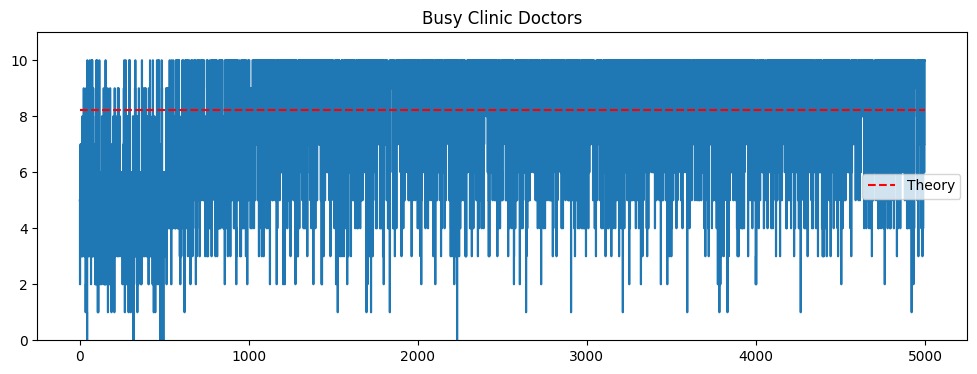

In [10]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

class HospitalSim:
    def __init__(self, n_R, d_C, d_E, n_I):
        self.caps = {'R': n_R, 'C': d_C, 'E': d_E, 'I': n_I}
        self.rates = {'R': 12, 'C': 4, 'E': 1, 'I': 1/72}
        self.queues, self.busy = {k:[] for k in self.caps}, {k:0 for k in self.caps}
        self.events, self.t, self.patients = [], 0.0, {}
        self.stats = {'times': [], 'counts': [], 'busy_C': [], 'clinic_waits': [], 'busy_C_area': 0}
        self.last_t = 0

    def sched(self, dt, type, pid, **kwargs):
        heapq.heappush(self.events, (self.t + dt, type, pid, kwargs))

    def run(self, max_time):
        self.sched(np.random.exponential(1/20), 'arr_new', -1)
        self.sched(np.random.exponential(1/5), 'arr_er', -1)
        pid_seq = 0
        while self.events:
            t_evt, type, pid, kwargs = heapq.heappop(self.events)
            if t_evt > max_time: break

            self.stats['busy_C_area'] += self.busy['C'] * (t_evt - self.last_t)
            if int(t_evt) > int(self.last_t):
                self.stats['times'].append(t_evt)
                self.stats['counts'].append(sum(len(q) + b for q, b in zip(self.queues.values(), self.busy.values())))
                self.stats['busy_C'].append(self.busy['C'])
            self.t, self.last_t = t_evt, t_evt

            if type in ['arr_new', 'arr_er']:
                pid_seq += 1
                self.patients[pid_seq] = {'t_start_C': 0}
                self.handle_arr('R' if type == 'arr_new' else 'E', pid_seq)
                self.sched(np.random.exponential(1/ (20 if type == 'arr_new' else 5)), type, -1)
            elif type == 'arr_loc': self.handle_arr(kwargs['loc'], pid)
            elif type == 'dep': self.handle_dep(kwargs['loc'], pid)

    def handle_arr(self, loc, pid):
        if loc == 'C': self.patients[pid]['t_start_C'] = self.t
        if self.busy[loc] < self.caps[loc]:
            self.busy[loc] += 1
            self.sched(np.random.exponential(1/self.rates[loc]), 'dep', pid, loc=loc)
        else: self.queues[loc].append(pid)

    def handle_dep(self, loc, pid):
        self.busy[loc] -= 1
        if loc == 'C': self.stats['clinic_waits'].append(self.t - self.patients[pid]['t_start_C'])

        next_loc, delay = None, 0
        if loc == 'R': next_loc = 'C'
        elif loc == 'C':
            r = np.random.rand()
            if r < 0.25: next_loc, delay = 'R', 504
            elif r < 0.35: next_loc = 'I'
        elif loc == 'E': next_loc = 'I' if np.random.rand() < 0.5 else None
        elif loc == 'I':
            if np.random.rand() < 0.8: next_loc, delay = 'R', 504

        if next_loc: self.sched(delay, 'arr_loc', pid, loc=next_loc)
        if self.queues[loc]:
            self.busy[loc] += 1
            self.sched(np.random.exponential(1/self.rates[loc]), 'dep', self.queues[loc].pop(0), loc=loc)

# --- Part (i) ---
plt.figure(figsize=(12, 5))
for cfg in [(4,10,7,418, "Stable (+1)"), (2,8,5,416, "Unstable (-1)")]:
    s = HospitalSim(*cfg[:4]); s.run(5000)
    plt.plot(s.stats['times'], s.stats['counts'], label=cfg[4])
plt.title("Total Patients in System"); plt.legend(); plt.grid(alpha=0.3); plt.show()

# --- Part (ii) ---
s = HospitalSim(3, 10, 7, 500); s.run(5000)
warmup = 2000
waits = [w for i, w in enumerate(s.stats['clinic_waits']) if s.stats['times'][min(i, len(s.stats['times'])-1)] > warmup] # Approx filter
waits = s.stats['clinic_waits'][int(len(s.stats['clinic_waits'])*0.2):] # Simple filter

print(f"Avg Clinic Time: {np.mean(waits):.4f} hrs (Theory: 0.3135)")
print(f"Avg Busy Docs: {s.stats['busy_C_area']/s.t:.4f} (Theory: 8.209)")

plt.figure(figsize=(12, 4))
plt.hist(waits, bins=30, density=True); plt.title("Clinic Wait Time Distribution")
plt.figure(figsize=(12,4))
plt.step(s.stats['times'], s.stats['busy_C'], where='post') # Use step for discrete
# plt.fill_between(s.stats['times'], s.stats['busy_C'], step='post', alpha=0.4) # Fill to bottom
plt.plot([0, 5000], [8.209, 8.209], 'r--', label='Theory');
plt.ylim(0, 11) # Force 0 at bottom
plt.title("Busy Clinic Doctors"); plt.legend(); plt.show()